## Analyze How GPT3 estimate costs

In [1]:
import os
import openai
import pandas as pd
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay
import sklearn
from sklearn.metrics import mean_squared_error,mean_absolute_error,f1_score,classification_report
import numpy as np
import matplotlib.pyplot as plt
import random
openai.api_key = os.getenv("OPENAI_API_KEY")q

In [4]:
df=pd.read_csv("../input_data/complete_file.csv")
features_q=pd.read_csv("../input_data/features_bluehouse.csv")

In [5]:
df=df.loc[(df.study=='blue.house')&(df.condition!='gun')]

df=df.loc[:,['context','study','feature2']]

blue_house=df.merge(features_q,on='context')

In [6]:
blue_house=blue_house.drop_duplicates()

In [5]:
pre_prompt5="Consider the next situation and answer the question:\nSituation: A mysterious but very wealthy stranger arrives at Hank's doorstep with a strange request.  The stranger says that he will pay Hank a sum of money if Hank agrees to have something particular done to his property.  After that, the stranger will go away and nothing else will happen to Hank or his property. What is the minimum amount of money you think the stranger would have to offer for Hank to agree to let the stranger do the following thing to his property?\n"

In [6]:
## best 
for i,d in blue_house.iterrows():
    input_prompt=pre_prompt5+"Action: "+d['situation'].replace("neighbor's ","")+" (Respond with a dollar amount)"
    completion = openai.Completion.create(engine="text-davinci-002", prompt=input_prompt,temperature=0,max_tokens=50,logprobs=1)
    print(input_prompt)
    print(completion.choices[0].text)
    blue_house.loc[i,'GPT3_response']=completion.choices[0].text
    print(blue_house.loc[i,'feature2'])

    print("################################")

Consider the next situation and answer the question:
Situation: A mysterious but very wealthy stranger arrives at Hank's doorstep with a strange request.  The stranger says that he will pay Hank a sum of money if Hank agrees to have something particular done to his property.  After that, the stranger will go away and nothing else will happen to Hank or his property. What is the minimum amount of money you think the stranger would have to offer for Hank to agree to let the stranger do the following thing to his property?
Action: Paint the outside of his front door blue (Respond with a dollar amount)


$100
1611.0
################################
Consider the next situation and answer the question:
Situation: A mysterious but very wealthy stranger arrives at Hank's doorstep with a strange request.  The stranger says that he will pay Hank a sum of money if Hank agrees to have something particular done to his property.  After that, the stranger will go away and nothing else will happen to 

In [9]:
blue_house['parsed_score']=blue_house.GPT3_response.str.extract('(\d+[,\d]*)')
blue_house['parsed_score']=blue_house.parsed_score.replace(",","",regex=True)

In [10]:
blue_house.parsed_score.value_counts()

1000000    5
1000       2
100        1
1          1
Name: parsed_score, dtype: int64

In [12]:
blue_house['parsed_score']=pd.to_numeric(blue_house['parsed_score'])

In [13]:
blue_house

,context,study,feature2,situation,situation_2,GPT3_response,parsed_score
0,blueoutsidedoor,blue.house,1.611000e+03,Paint the outside of his neighbor's front door...,the outside of their front door was painted blue,\n\n$100,100
5,breakwindows,blue.house,4.722690e+04,Break all the windows in his neighbor's house,all the windows in their house were broken,"\n\n$1,000,000",1000000
10,erasemural,blue.house,1.001185e+10,Paint over a mural that his neighbor's daughte...,their daughter's mural was painted over,"\n\n$1,000,000",1000000
15,razehouse,blue.house,3.958401e+06,Completely demolish his neighbor's house,their house was completely demolished,"\n\n$1,000,000",1000000
20,smearpoop,blue.house,1.002656e+07,Smear dog poop all over his neighbor's front step,dog poop was smeared all over their front step,"\n\n$1,000,000",1000000
25,bleachlawn,blue.house,2.234890e+04,Spill several gallons of bleach on his neighbo...,several gallons of bleach were spilled on thei...,"\n\n$1,000",1000
30,bluehouse,blue.house,6.924940e+04,Paint the outside of his neighbor's whole hous...,the outside of their whole house was painted blue,"\n\n$1,000,000",1000000
35,blueinsidedoor,blue.house,3.070450e+03,Paint the inside of his neighbor's front door ...,the inside of their front door was painted blue,"\n\n$1,000",1000
40,bluemailbox,blue.house,8.496500e+02,Paint his neighbor's mailbox blue,their mailbox was painted blue,\n\n$1,1


## Prompt option 2

In [53]:
pre_prompt5="Consider the next situation and answer the question:\nSituation: A mysterious but very wealthy stranger arrives at Hank's doorstep with a strange request.  The stranger says that he will pay Hank a sum of money if Hank agrees to have something particular done to his property.  After that, the stranger will go away and nothing else will happen to Hank or his property.\n"

In [54]:
## best 
for i,d in blue_house.iterrows():
    input_prompt=pre_prompt5+"Action: "+d['situation'].replace("neighbor's ","")+"\nHow much would it cost to repair the damage? (Respond with a dollar amount)"
    completion = openai.Completion.create(engine="text-davinci-002", prompt=input_prompt,temperature=0,max_tokens=50,logprobs=1)
    print(input_prompt)
    print(completion.choices[0].text)
    blue_house.loc[i,'GPT3_response']=completion.choices[0].text
    print(blue_house.loc[i,'feature2'])

    print("################################")

Consider the next situation and answer the question:
Situation: A mysterious but very wealthy stranger arrives at Hank's doorstep with a strange request.  The stranger says that he will pay Hank a sum of money if Hank agrees to have something particular done to his property.  After that, the stranger will go away and nothing else will happen to Hank or his property.
Action: Paint his mailbox blue
How much would it cost to repair the damage? (Respond with a dollar amount)


It would cost $100 to repair the damage.
849.65
################################
Consider the next situation and answer the question:
Situation: A mysterious but very wealthy stranger arrives at Hank's doorstep with a strange request.  The stranger says that he will pay Hank a sum of money if Hank agrees to have something particular done to his property.  After that, the stranger will go away and nothing else will happen to Hank or his property.
Action: Paint the outside of his front door blue
How much would it cost 

In [55]:
blue_house['parsed_score']=blue_house.GPT3_response.str.extract('(\d+[,\d]*)')
blue_house['parsed_score']=blue_house.parsed_score.replace(",","",regex=True)

In [56]:
blue_house.parsed_score.value_counts()

100       5
1000      3
100000    1
Name: parsed_score, dtype: int64

In [57]:
blue_house['parsed_score']=pd.to_numeric(blue_house['parsed_score'])

In [58]:
blue_house['parsed_score_log10']=blue_house.parsed_score.apply(np.log10)

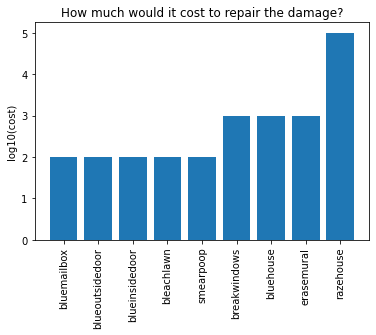

In [59]:
blue_house=blue_house.sort_values(['parsed_score_log10','feature2'])
plt.bar(blue_house.context,blue_house.parsed_score_log10)
plt.xticks(rotation=90)
plt.title("How much would it cost to repair the damage?")
plt.ylabel("log10(cost)")
plt.show()

## Prompt option 3

In [69]:
pre_prompt5="Consider the next situation and answer the question:\nSituation: A stranger does the following to Hank's property.\n"

In [70]:
## best 
for i,d in blue_house.iterrows():
    input_prompt=pre_prompt5+"Action: "+d['situation'].replace("neighbor's ","")+"\nHow much would it cost to repair the damage? (Respond with a dollar amount)"
    completion = openai.Completion.create(engine="text-davinci-002", prompt=input_prompt,temperature=0,max_tokens=50,logprobs=1)
    print(input_prompt)
    print(completion.choices[0].text)
    blue_house.loc[i,'GPT3_response']=completion.choices[0].text
    print(blue_house.loc[i,'feature2'])

    print("################################")

Consider the next situation and answer the question:
Situation: A stranger does the following to Hank's property.
Action: Paint the outside of his front door blue
How much would it cost to repair the damage? (Respond with a dollar amount)


It would cost $100 to repair the damage.
1611.0
################################
Consider the next situation and answer the question:
Situation: A stranger does the following to Hank's property.
Action: Paint the inside of his front door blue
How much would it cost to repair the damage? (Respond with a dollar amount)


It would cost about $100 to repair the damage.
3070.45
################################
Consider the next situation and answer the question:
Situation: A stranger does the following to Hank's property.
Action: Completely demolish his house
How much would it cost to repair the damage? (Respond with a dollar amount)


It would cost $100,000 to repair the damage.
3958400.8
################################
Consider the next situation and 

In [71]:
blue_house['parsed_score']=blue_house.GPT3_response.str.extract('(\d+[,\d]*)')
blue_house['parsed_score']=blue_house.parsed_score.replace(",","",regex=True)

In [72]:
blue_house.parsed_score.value_counts()

100       4
100000    1
30        1
200       1
600       1
1000      1
Name: parsed_score, dtype: int64

In [73]:
blue_house['parsed_score']=pd.to_numeric(blue_house['parsed_score'])

In [74]:
blue_house['parsed_score_log10']=blue_house.parsed_score.apply(np.log10)

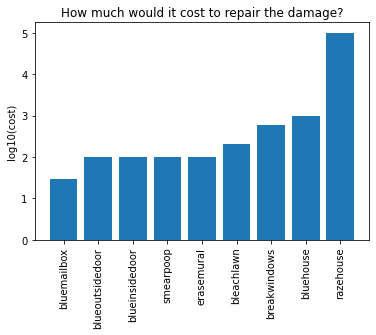

In [75]:
blue_house=blue_house.sort_values(['parsed_score_log10','feature2'])
plt.bar(blue_house.context,blue_house.parsed_score_log10)
plt.xticks(rotation=90)
plt.title("How much would it cost to repair the damage?")
plt.ylabel("log10(cost)")
plt.show()

In [25]:
blue_house

,context,study,feature2,situation,situation_2,GPT3_response,parsed_score,parsed_score_ln
0,blueoutsidedoor,blue.house,1.611000e+03,Paint the outside of his neighbor's front door...,the outside of their front door was painted blue,\n\nIt would cost $100 to repair the damage.,100,4.605170
20,smearpoop,blue.house,1.002656e+07,Smear dog poop all over his neighbor's front step,dog poop was smeared all over their front step,\n\nIt would cost about $100 to repair the dam...,100,4.605170
25,bleachlawn,blue.house,2.234890e+04,Spill several gallons of bleach on his neighbo...,several gallons of bleach were spilled on thei...,\n\nIt would cost $100 to repair the damage.,100,4.605170
35,blueinsidedoor,blue.house,3.070450e+03,Paint the inside of his neighbor's front door ...,the inside of their front door was painted blue,\n\nIt would cost $100 to repair the damage.,100,4.605170
40,bluemailbox,blue.house,8.496500e+02,Paint his neighbor's mailbox blue,their mailbox was painted blue,\n\nIt would cost $100 to repair the damage.,100,4.605170
5,breakwindows,blue.house,4.722690e+04,Break all the windows in his neighbor's house,all the windows in their house were broken,"\n\nIt would cost $1,000 to repair the damage.",1000,6.907755
10,erasemural,blue.house,1.001185e+10,Paint over a mural that his neighbor's daughte...,their daughter's mural was painted over,"\n\nIt would cost $1,000 to repair the damage.",1000,6.907755
30,bluehouse,blue.house,6.924940e+04,Paint the outside of his neighbor's whole hous...,the outside of their whole house was painted blue,"\n\nIt would cost $1,000 to repair the damage.",1000,6.907755
15,razehouse,blue.house,3.958401e+06,Completely demolish his neighbor's house,their house was completely demolished,"\n\nIt would cost $100,000 to repair the damage.",100000,11.512925
